<a href="https://colab.research.google.com/github/SwenFereira/-Book-Recommendation-System/blob/main/Final_Copy_of_Swen_Fereira_Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Book Recommendation System**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.


**Content:**

The Book-Crossing dataset comprises 3 files.

**Users**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

**Books**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

**Ratings**

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

# **Objective:**

**The main objective is to create a machine learning model to recommend relevant books to users based on popularity and user interests.**

# **Importing Liabraries:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from PIL import Image
import requests
from io import BytesIO
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import random

# **Importing DataFrame:**

In [2]:
books = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Main Projects /Book Recommendation System/ Books.csv")

In [3]:
users = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Main Projects /Book Recommendation System/Users.csv")

In [4]:
ratings = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Main Projects /Book Recommendation System/Ratings.csv")

# **Data Preprocessing:**

**Books:**

In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
#Shape of Books Data Frame
books.shape

(271360, 8)

In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
# Checking Null Values
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [9]:
# droping Null Values
books.dropna(inplace=True)

In [10]:
# shape of dataframe after droping null values
books.shape

(271354, 8)

In [11]:
# DataFrame columns
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [12]:
# Checking Duplicate Data
books.duplicated().sum()

0

In [13]:
# unique publication dates
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

- All the data in object type but year of publication must be in integers.
- Some of 'year of publication' date are 0 so we have to take some action on it.
- There are some values above 2021 in "year of publication" so we have to take care of these values also.

In [14]:
# converting dtype of Year of publication from object to integer
books['Year-Of-Publication']=books['Year-Of-Publication'].astype("int")

In [15]:
# we have only 13 values above 2021 
books[books['Year-Of-Publication']>2021].value_counts().sum()

13

In [16]:
# droping values above 2021
books=books[books['Year-Of-Publication']<=2021].reset_index(drop=True)

In [17]:
# we have 3570 values with 0
books[books['Year-Of-Publication']==0].value_counts().sum()

4618

In [18]:
# median of books Year-Of-Publication
books['Year-Of-Publication'].median()

1995.0

In [19]:
#replacing 0 with median value of Year-Of-Publication
books['Year-Of-Publication']=books['Year-Of-Publication'].replace(0,1995)

In [20]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 1911, 1904,
       1949, 1932, 1928, 1929, 1927, 1931, 1914, 1934, 1910, 1933, 1902,
       1924, 1921, 1900, 1944, 1917, 1901, 2010, 1908, 1906, 1935, 1806,
       2021, 2012, 2006, 1909, 2008, 1378, 1919, 1922, 1897, 1376])

## **User DataFrame:**

In [21]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [23]:
# info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [24]:
# Shape of DataFrame
users.shape

(278858, 3)

In [25]:
# checking Null Values
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [26]:
users.duplicated().sum()

0

## **Rating DataFrame:**

In [27]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [28]:
# shape of data
ratings.shape

(1149780, 3)

In [29]:
# Checking Null Values
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [30]:
# Checking Null Values
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

# **Data preparation for k-Nearest Neighbour Model:**

- We will take only those users who rate on minimum 200 books.
- We will consider only those books which are rated by at least 50 users.

In [31]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [32]:
ratings.shape

(1149780, 3)

In [33]:
# so from 278858 users only 105283 user rated the books
ratings['User-ID'].value_counts().shape

(105283,)

**Now we Need only those users who rates on atleast 200 books**

In [34]:
users_200 = ratings['User-ID'].value_counts()>=200


In [35]:
# here we have 899 users, user_id who rate atleast on 200 books
users_id_200=users_200[users_200].index

In [36]:
users_id_200.shape

(905,)

In [37]:
# New ratings data frame only those people who give ratings atleats on 200 books
ratings_df=ratings[ratings['User-ID'].isin(users_id_200)]

In [38]:
# ratings dataframe shape
ratings_df.shape

(527556, 3)

- We are getting observation from here that 278858 people had rated on 1149780 Books but out of this only 905 people have given rating on 527556 Books

- This tells us that most people do not rate

- That's why we removed them from the data

In [39]:
# creating new data frame of ratings with books
ratings_with_books = ratings_df.merge(books, on ="ISBN")

In [40]:
ratings_with_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [41]:
ratings_with_books.shape

(488713, 10)

**Now we have only those books on which at least 200 people have rated.**

In [42]:
# Count of ratings on each books
count_of_ratings=ratings_with_books.groupby("Book-Title")["Book-Rating"].count().reset_index()

In [43]:
count_of_ratings.head()

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [44]:
# Renaming the Book-rating column because now its not rating now its count of ratings
count_of_ratings.rename(columns = {"Book-Rating":"count_of_ratings"},inplace= True)

In [45]:
# merging number of rating dataframe with rating with books
rating_df=ratings_with_books.merge(count_of_ratings,on="Book-Title")

In [46]:
# We only consider books that are rated at least 50 times
df=rating_df[rating_df["count_of_ratings"]>=10].reset_index(drop=True)

In [47]:
df.shape

(198010, 11)

**Now we have users who rated at least 200 books and those books which are rated by at least 50 users.**

In [48]:
# check duplicates in data
df.duplicated(["User-ID","Book-Title"]).sum()

3730

In [49]:
# droping duplicates
df.drop_duplicates(["User-ID","Book-Title"],inplace=True)

In [50]:
df.shape

(194280, 11)

In [51]:
df.sample(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,count_of_ratings
124192,266865,0312291655,0,The Good Sister,Diana Diamond,2002,St. Martin's Press,http://images.amazon.com/images/P/0312291655.0...,http://images.amazon.com/images/P/0312291655.0...,http://images.amazon.com/images/P/0312291655.0...,13
62208,115490,0679426159,0,Standing in the Rainbow : A Novel,FANNIE FLAGG,2002,Random House,http://images.amazon.com/images/P/0679426159.0...,http://images.amazon.com/images/P/0679426159.0...,http://images.amazon.com/images/P/0679426159.0...,20
19321,236283,0553264079,0,I'll Take Manhattan,Judith Krantz,1987,Bantam Books,http://images.amazon.com/images/P/0553264079.0...,http://images.amazon.com/images/P/0553264079.0...,http://images.amazon.com/images/P/0553264079.0...,48
94714,127359,0525947299,0,No Second Chance,Harlan Coben,2003,Dutton Books,http://images.amazon.com/images/P/0525947299.0...,http://images.amazon.com/images/P/0525947299.0...,http://images.amazon.com/images/P/0525947299.0...,30
88262,11676,0345402308,7,Fourth Procedure,STANLEY POTTINGER,1995,Ballantine Books,http://images.amazon.com/images/P/0345402308.0...,http://images.amazon.com/images/P/0345402308.0...,http://images.amazon.com/images/P/0345402308.0...,25


# **Exploratory Data Analysis:**

In [52]:
# Top 10 Books
pd.value_counts(df['Book-Title']).iloc[:10]

Wild Animus                                        365
The Lovely Bones: A Novel                          272
Bridget Jones's Diary                              237
The Pelican Brief                                  228
Divine Secrets of the Ya-Ya Sisterhood: A Novel    226
The Da Vinci Code                                  225
The Nanny Diaries: A Novel                         225
The Firm                                           215
The Notebook                                       214
A Painted House                                    212
Name: Book-Title, dtype: int64

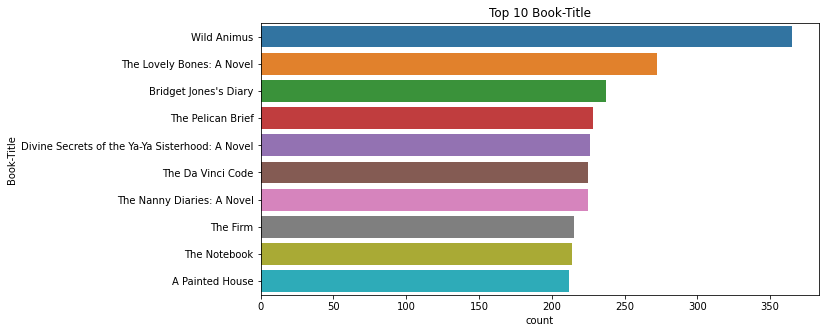

In [54]:
# Top 10 Books
plt.figure(figsize=(10,5))
sns.countplot(y='Book-Title',data=df, order=pd.value_counts(df['Book-Title']).iloc[:10].index)
plt.title('Top 10 Book-Title')
plt.show()

- The top most book title found is Wild Animus.
- Wild Animus is present in 365 rows

In [55]:
# unique Authors count
df['Book-Author'].nunique()

4249

In [56]:
# Top 10 Book Authors
df['Book-Author'].value_counts().head(10)

Nora Roberts          3958
Stephen King          3533
James Patterson       2078
Mary Higgins Clark    1938
Danielle Steel        1844
Dean R. Koontz        1791
John Grisham          1760
V.C. Andrews          1542
Sue Grafton           1465
Tom Clancy            1444
Name: Book-Author, dtype: int64

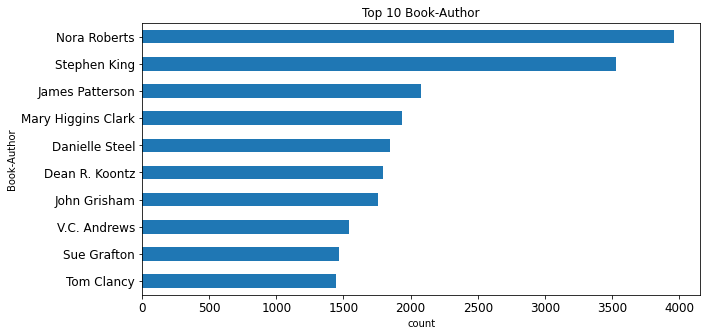

In [57]:
# Top 10 Book Authors
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = df['Book-Author'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Book-Author', fontsize=12)
plt.xlabel('count')
plt.ylabel('Book-Author')
plt.show()

- The top most author found is Nora Roberts.
- Total No of Books written is 3958 .


In [58]:
# COunt of Unique Publisher
df['Publisher'].nunique()

1075

In [59]:
# Top 10 Publshers
df['Publisher'].value_counts().head(10).sort_values(ascending=True)

Dell                         5809
Jove Books                   6007
Signet Book                  6149
Avon                         6363
Bantam                       6581
Bantam Books                 7063
Warner Books                 7866
Berkley Publishing Group     9690
Ballantine Books            10368
Pocket                      10786
Name: Publisher, dtype: int64

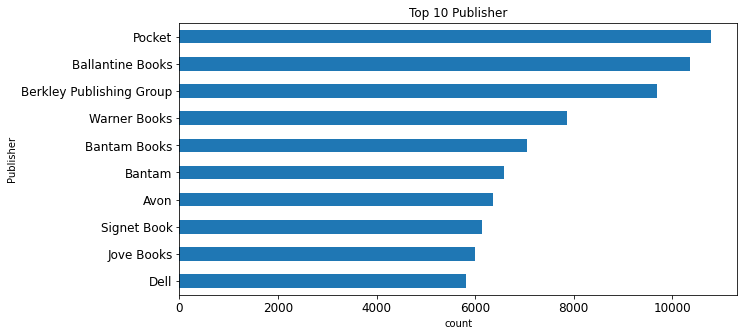

In [60]:
# Top 10 Publishers
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = df['Publisher'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Publisher', fontsize=12)
plt.xlabel('count')
plt.ylabel('Publisher')
plt.show()

- The top most Publishers is Pocket.
- Total no of  Books Published is 10786 .

In [61]:
# year of publication Ratio
df['Year-Of-Publication'].value_counts().head(10)

2002    19817
2001    15834
2003    15341
1999    14913
2000    13654
1996    12439
1995    12183
1998    11607
1997    11217
1994     9230
Name: Year-Of-Publication, dtype: int64

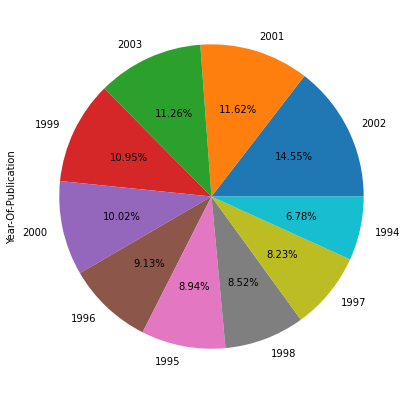

In [62]:
# year of Publication Ratio
fig= plt.figure(figsize=(15,7))
df['Year-Of-Publication'].value_counts().head(10).plot(kind='pie', autopct='%1.2f%%')
plt.show()

- Most books were published in the year of 2002.

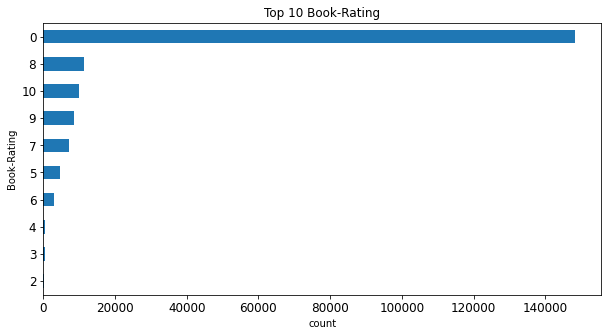

In [63]:
# Checking the ratings.
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ =df['Book-Rating'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Book-Rating', fontsize=12)
plt.xlabel('count')
plt.ylabel('Book-Rating')
plt.show()

- Highest rating is 8 out of 10.
- Lowest rating is 1 out of 10.
- Most of the people haven't given the ratings.

# **Collaborative Filtering:**

Collaborative filtering (CF) is a technique used by recommender systems.In the newer, narrower sense, collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating).

## **Implementing k-Nearest Neighbors:**

We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “brute”. Finally, we fit the model.

At first create a pivote table.



In [65]:
# creating pivot table where user-id becomes our columns and book title become our index
book_pivot=df.pivot_table(columns="User-ID",index="Book-Title",values = 'Book-Rating')

In [66]:
book_pivot.head()

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Q-Space (Star Trek The Next Generation, Book 47)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-01-00: The Novel of the Millennium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Lb. Penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1001 Ways to Be Romantic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# book_pivot shape
book_pivot.shape

(8061, 902)

In [68]:
# fill Nan values to 0
book_pivot.fillna(0,inplace=True)

In [69]:
book_pivot.head()

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Q-Space (Star Trek The Next Generation, Book 47)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-01-00: The Novel of the Millennium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001 Ways to Be Romantic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **CSR Matrix:**

The compressed sparse row (CSR) or compressed row storage (CRS) or Yale format represents a matrix M by three (one-dimensional) arrays, that respectively contain nonzero values, the extents of rows, and column indices. It is similar to COO, but compresses the row indices, hence the name.

In [70]:
# converting to sparse matrix
books_sparse = csr_matrix(book_pivot)

In [71]:
type(books_sparse)

scipy.sparse.csr.csr_matrix

In [72]:
# storing model in a varible
model =  NearestNeighbors(algorithm="brute") # we change our model to brute

In [74]:
# fitting our model to book sparse data
model.fit(books_sparse)

NearestNeighbors(algorithm='brute')

In [75]:
# create a function for suggest books by book names

def suggest_books_by_book_names(book_name):
  distances, suggestions = model.kneighbors(book_pivot.loc[book_name,:].values.reshape(1,-1), n_neighbors = 6)
  for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Your Choice {0}:\n'.format(book_pivot.index[suggestions[0][0]]))
        book_index_list=books.index[books['Book-Title'] == book_name].tolist()
        book_index = book_index_list[0]
        url = books['Image-URL-L'][book_index]
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.show()
        print('\n','*'*20, "Recommendation for ", book_name , '*'*20,'\n')

    else:
        print('{0}: {1}, with distance of {2}:'.format(i, book_pivot.index[suggestions.flatten()[i]], distances.flatten()[i]))
        book = book_pivot.index[suggestions.flatten()[i]]
        book_ratings= book_pivot.loc[book,:].values.reshape(1,-1).tolist()[0]
        z = []
        for i in book_ratings:
          if i !=0:
            z.append(i)
        
        print('\n Average Rating of Book is ',round(np.mean(z),1))
        book_index_list=books.index[books['Book-Title'] == book].tolist()
        book_index = book_index_list[0]
        url = books['Image-URL-L'][book_index]
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.show()

Your Choice The Lovely Bones: A Novel:



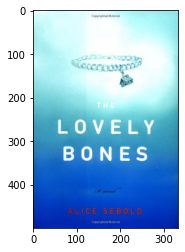


 ******************** Recommendation for  The Lovely Bones: A Novel ******************** 

1: The Other Side and Back: A Psychic's Guide to Our World and Beyond, with distance of 83.66002629691195:

 Average Rating of Book is  8.2


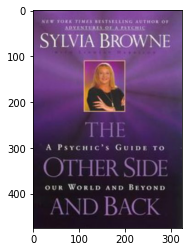

2: In a Class by Itself, with distance of 83.80930735902786:

 Average Rating of Book is  7.6


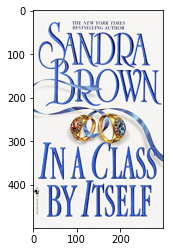

3: A Girl Named Zippy: Growing Up Small in Mooreland Indiana (Today Show Book Club #3), with distance of 83.97023282092292:

 Average Rating of Book is  7.2


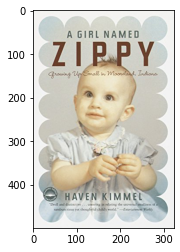

4: The Absence of Nectar, with distance of 83.98214095865859:

 Average Rating of Book is  8.3


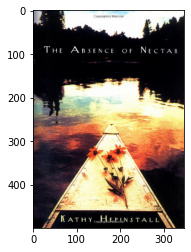

5: Gap Creek: The Story Of A Marriage, with distance of 84.02380615040002:

 Average Rating of Book is  8.0


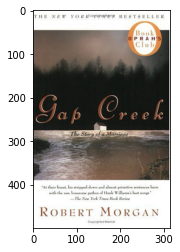

In [76]:
# call function for recommendation
suggest_books_by_book_names('The Lovely Bones: A Novel')

In [77]:
# create a function for predict books by index number
def suggest_books_by_index(index_number):
  distances, suggestions = model.kneighbors(book_pivot.iloc[index_number,:].values.reshape(1,-1), n_neighbors = 6)
  for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Your Choice {0}:\n'.format(book_pivot.index[suggestions[0][0]]))
        book = book_pivot.index[suggestions[0][0]]
        book_index_list=books.index[books['Book-Title'] == book].tolist()
        book_index = book_index_list[0]
        url = books['Image-URL-L'][book_index]
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.show()
        print('\n','*'*20, "Recommendation for ", book , '*'*20,'\n')

    else:
        print('{0}: {1}, with distance of {2}:'.format(i, book_pivot.index[suggestions.flatten()[i]], distances.flatten()[i]))

        book = book_pivot.index[suggestions.flatten()[i]]
        book_index_list=books.index[books['Book-Title'] == book].tolist()
        book_index = book_index_list[0]
        book_ratings= book_pivot.loc[book,:].values.reshape(1,-1).tolist()[0]
        z = []
        for i in book_ratings:
          if i !=0:
            z.append(i)
        
        print('\n Average Rating of Book is ',round(np.mean(z),1))

        url = books['Image-URL-L'][book_index]
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.show()

Your Choice A Walk to Remember:



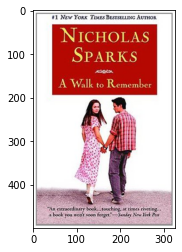


 ******************** Recommendation for  A Walk to Remember ******************** 

1: Reba: My Story, with distance of 39.64845520319802:

 Average Rating of Book is  8.0


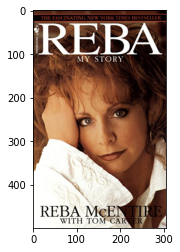

2: Infernal Affairs, with distance of 40.620192023179804:

 Average Rating of Book is  8.0


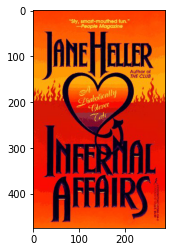

3: Inner Simplicity : 100 Ways to Regain Peace and Nourish Your Souls, with distance of 40.7308237088326:

 Average Rating of Book is  7.5


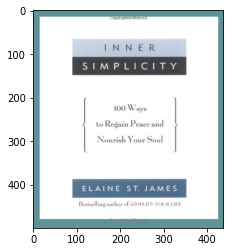

4: My Life on A Plate, with distance of 40.779897008207364:

 Average Rating of Book is  7.8


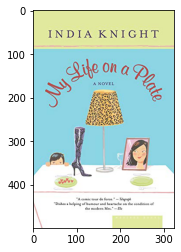

5: My Sister the Moon, with distance of 40.8166632639171:

 Average Rating of Book is  7.0


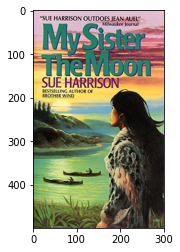

In [78]:
# call function for recommendation
suggest_books_by_index(274)

# **Data Prepration for Singular value decomposition (SVD):**

- We are Considering only those ratings that are not equal to 0
- Filter Users with atleast 20 interaction
- Filter Books(ISBN) with atleast 10 Ratings

In [79]:
#ratings head
ratings.head()


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [80]:
# ratings shape 
print("Ratings data before dropping 0 = ",ratings.shape[0] )
# Consedring only those data which have ratings, Droping ratings that are 0
ratings_df=ratings[ratings["Book-Rating"]!=0]
# ratings df shape after droping 0
print("Ratings data after dropping 0 = ", ratings_df.shape[0])

Ratings data before dropping 0 =  1149780
Ratings data after dropping 0 =  433671


- After Droping 0 ratings our data contains only 433671 rows

In [81]:
# User count
user_count = pd.DataFrame(ratings_df['User-ID'].value_counts().reset_index())
# Renaming columns
user_count.columns = ['User-ID', 'user_count']

# merge 'rating_df' & 'user_count' on user id
ratings_df_count = pd.merge(ratings_df, user_count, on='User-ID')

In [82]:
# head of rating df
ratings_df_count.head()

,User-ID,ISBN,Book-Rating,user_count
0,276726,0155061224,5,1
1,276729,052165615X,3,2
2,276729,0521795028,6,2
3,276736,3257224281,8,1
4,276737,0600570967,6,1


In [83]:
# Rating count with ISBN
isbn_rating_count=ratings_df_count.groupby("ISBN")["Book-Rating"].count().reset_index()
#renaming column
isbn_rating_count=isbn_rating_count.rename(columns={'Book-Rating':'count_isbn_rating'})
# merge "rating_df_count" & 'isbn_rating_count' on ISBN
ratings_df_count = pd.merge(ratings_df_count, isbn_rating_count, on='ISBN')
# Head of ratings_df_count
ratings_df_count.head()

,User-ID,ISBN,Book-Rating,user_count,count_isbn_rating
0,276726,0155061224,5,1,1
1,276729,052165615X,3,2,1
2,276729,0521795028,6,2,1
3,276736,3257224281,8,1,4
4,86583,3257224281,6,18,4


### **Filter Users with atleast 20 interaction & Books(ISBN) with atleast 10 Ratings:**

In [84]:
# considering only those data which have atleast 20 "user_count" and 10 "count_isbn_rating"
interactions_from_selected_users_df=ratings_df_count[(ratings_df_count['user_count'] >= 20) & (ratings_df_count['count_isbn_rating'] >= 10)].reset_index(drop=True)


For our model, we need minimum two same users so we are droping those users which are only remaing one in data.

In [85]:
interactions_from_selected_users_df.head()

,User-ID,ISBN,Book-Rating,user_count,count_isbn_rating
0,11676,038550120X,10,8524,81
1,21356,038550120X,7,24,81
2,22625,038550120X,10,98,81
3,31315,038550120X,6,333,81
4,33974,038550120X,8,78,81


In [86]:
# User count
user_count = pd.DataFrame(interactions_from_selected_users_df['User-ID'].value_counts().reset_index())
# Renaming columns
user_count.columns = ['User-ID', 'user_count1']

# merge 'interactions_from_selected_users_df' & 'user_count' on user id
interactions_from_selected_users_df = pd.merge(interactions_from_selected_users_df, user_count, on='User-ID')

# droping users with single interaction
interactions_from_selected_users_df=interactions_from_selected_users_df[interactions_from_selected_users_df['user_count1']!=1]

In [87]:
# droping "user_count" & "count_isbn_rating" because now we don't need
interactions_from_selected_users_df.drop(columns=['user_count','count_isbn_rating','user_count1'],inplace=True)

In [88]:
print("Total ratings data after droping 0 =", ratings_df.shape[0])

print("Total rating data after filtering with 20 users interation and 10 book ratings =", interactions_from_selected_users_df.shape[0])

Total ratings data after droping 0 = 433671
Total rating data after filtering with 20 users interation and 10 book ratings = 72385


## **We are applying log transformation to smooth the distribution!!**

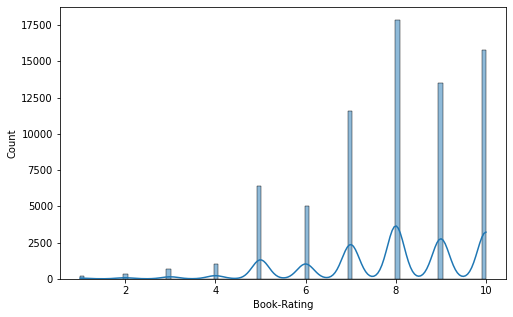

In [89]:
# Before log transformation
plt.figure(figsize=(8, 5))
sns.histplot(interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum(), kde=True)
plt.show()

In [90]:
import math
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('Number of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.sample(5)

Number of unique user/item interactions: 72385


,ISBN,User-ID,Book-Rating
26274,039592720X,66878,3.321928
27754,0425113884,224764,3.000000
4623,0064407667,205487,2.584963
5882,0140124381,114893,3.321928
33765,0440225701,169699,3.169925


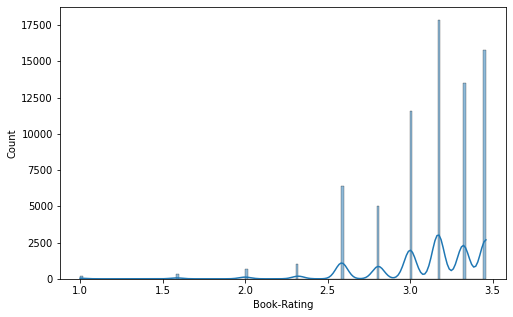

In [91]:
# After log transformation
plt.figure(figsize=(8, 5))
sns.histplot(interactions_full_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum(), kde=True)
plt.show()

## **Splitting data into Train And Test Dataset:**

In [92]:
#Splitting data into Train And Test Dataset
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('Number interactions on Train set: %d' % len(interactions_train_df))
print('Number interactions on Test set: %d' % len(interactions_test_df))

Number interactions on Train set: 57908
Number interactions on Test set: 14477


In [93]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0002558122,000648302X,000649840X,0006513204,0006513220,0006514855,0006547834,0006550576,0006550681,0006550789,...,880781210X,8807813025,8817106100,8817106259,8845205118,8845247414,8873122933,9726106141,9727722458,9770390107900
User-ID,,,,,,,,,,,,,,,,,,,,,
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
# Check the list of user id of the users
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[242, 254, 507, 638, 643, 651, 709, 805, 882, 929]

# **Implementing Singular-Value Decomposition (SVD):**

The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler. It provides another way to factorize a matrix, into singular vectors and singular values.

In [96]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [97]:
users_items_pivot_matrix.shape

(3410, 5632)

In [98]:
U.shape

(3410, 15)

In [99]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [100]:
Vt.shape

(15, 5632)

**After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.**

In [101]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[-8.25728539e-05,  3.70934878e-03,  3.41560453e-03, ...,
         2.40121262e-04, -3.10714064e-04,  6.65186581e-04],
       [ 4.51174893e-03,  7.13826764e-03,  2.21831317e-03, ...,
         2.42016107e-03,  1.11500012e-02, -1.28181280e-03],
       [-2.15670571e-04, -2.62529749e-03, -1.41011702e-03, ...,
         1.85988858e-04,  3.80407850e-04, -1.28712311e-03],
       ...,
       [ 2.09727024e-04, -1.30430692e-02, -1.01164276e-03, ...,
        -6.45562793e-04,  5.89639566e-04, -2.11760324e-03],
       [-3.56235005e-04, -5.98470727e-03, -9.64101852e-04, ...,
         3.33992480e-03,  2.39198616e-03, -2.46765415e-03],
       [ 1.44982570e-03,  6.34439200e-03, -7.56806174e-05, ...,
         9.98803412e-04,  2.98007733e-03,  1.89172851e-04]])

In [102]:
all_user_predicted_ratings.shape

(3410, 5632)

**Making DataFrame from our predicted ratings.**

In [103]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,242,254,507,638,643,651,709,805,882,929,...,278026,278137,278188,278202,278221,278356,278418,278582,278633,278843
ISBN,,,,,,,,,,,,,,,,,,,,,
0002558122,-0.000083,0.004512,-0.000216,-0.000148,0.000033,0.000003,-0.000219,0.000103,0.000208,7.487825e-07,...,-0.000195,0.000274,0.000025,-0.000034,-0.000207,0.004196,-0.000056,0.000210,-0.000356,0.001450
000648302X,0.003709,0.007138,-0.002625,0.007124,0.006621,0.000120,-0.002321,0.007256,-0.001963,1.130196e-02,...,0.000107,0.007844,0.007697,0.005010,0.004906,0.007768,0.006734,-0.013043,-0.005985,0.006344
000649840X,0.003416,0.002218,-0.001410,0.041500,0.006620,-0.000618,0.010633,0.013226,0.007025,9.572789e-03,...,0.009330,0.000742,0.008499,0.003895,0.003075,-0.002371,0.002989,-0.001012,-0.000964,-0.000076
0006513204,0.001950,-0.003935,-0.003837,0.027596,0.006158,-0.000758,-0.002224,0.004603,0.002479,7.666799e-03,...,0.006808,-0.000198,0.009018,0.004934,0.003190,0.002866,0.002842,-0.006654,-0.008460,-0.000165
0006513220,0.001749,-0.003310,-0.003378,0.011456,0.004767,-0.000786,-0.001037,0.002299,-0.007204,6.312075e-03,...,0.005836,0.000520,0.007537,0.003859,0.002318,0.002937,0.002478,-0.005490,-0.006492,0.000389


# **Colaborative Filtering Recommender Class:**